In [1]:
import pandas as pd
import numpy as np

## Data Cleaning

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


The original data is missing column names. For easier analysis, we add the column names to the dataset and reload the data without header. 

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.csv', header=None)
df.columns = ["Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size","Uniformity_of_Cell_Shape",
"Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin",
"Normal_Nucleoli", "Mitoses","Class"]
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

The data is now of desired number of rows and columns as described.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


There are no null values in the dataset. However, according to the description of the dataset, all columns should only contain integer values. The 'Bare_Nuclei' column has type object, meaning that there are some non-numeric values. We need to further examine the 'Bare_Nuclei' column. 

In [6]:
df['Bare_Nuclei'].unique()


array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [7]:
len(df[df['Bare_Nuclei']=='?'])

16

In [8]:
df.apply(pd.to_numeric, errors='coerce', downcast='integer')['Bare_Nuclei'].isnull().sum()

16

We see that '?' is included in the values in addition to the expected values, and there are 16 rows with '?'. If we try to turn the values in 'Bare_Nuclei' column to nuermic, there are 16 null values, which means that these 16 rows are missing 'Bare_Nuclei' in the dataset and the missing values are indicated by '?' at first.   
The percentage of missing data is about 2% which is low. It should be acceptable to drop these rows. 

In [9]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           683 non-null    int64  
 1   Clump_Thickness              683 non-null    int64  
 2   Uniformity_of_Cell_Size      683 non-null    int64  
 3   Uniformity_of_Cell_Shape     683 non-null    int64  
 4   Marginal_Adhesion            683 non-null    int64  
 5   Single_Epithelial_Cell_Size  683 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              683 non-null    int64  
 8   Normal_Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


After cleaning the data, we have 683 obersvations. We may change the type of 'Bare_Nuclei' column to be consistent with other columns.

In [11]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(np.int64) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample_code_number           683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Uniformity_of_Cell_Size      683 non-null    int64
 3   Uniformity_of_Cell_Shape     683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


## Preliminary data anaysis
Since this is a classification problem, we need to determine if the class is skewed.

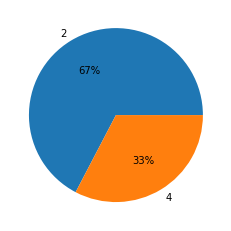

In [13]:
import matplotlib.pyplot as plt
aggsum = df.Sample_code_number.groupby(df.Class).sum()
plt.pie(aggsum, labels=aggsum.index, autopct='%1.0f%%')
plt.show()


We see that 67% of the data has class benign (class 2) so the data is a bit skewed towards class benign. This may influence the result of the model but we still proceed as this imbalance between classes is not significant. We may adjust the sampling method to improve.

In [14]:
df.iloc[:,1:].describe() # basic statistics of the relevant featutres. Sample code number is irrelevant in predicting the class.

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


The standard deviation of the relavent features are almost around the same scale but we still need to consider standardization to make sure the predicted result is not heavily affected by features of large scale.

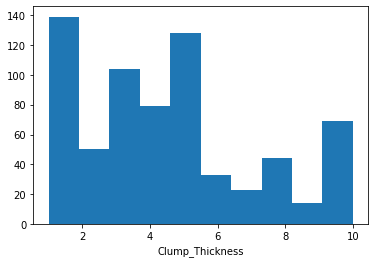

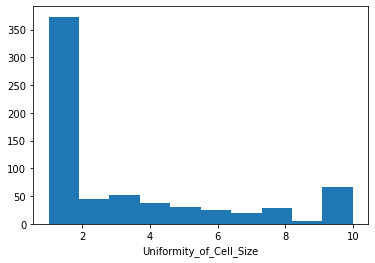

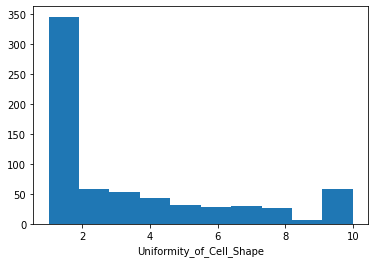

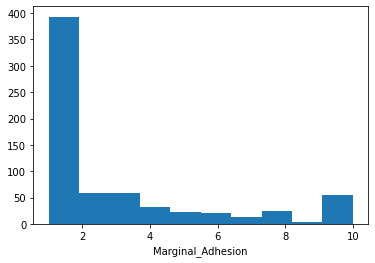

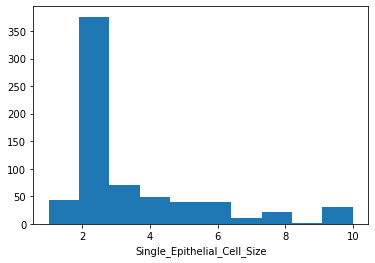

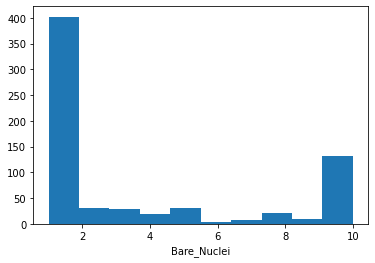

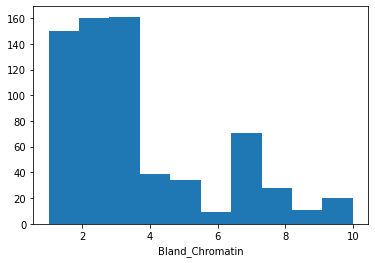

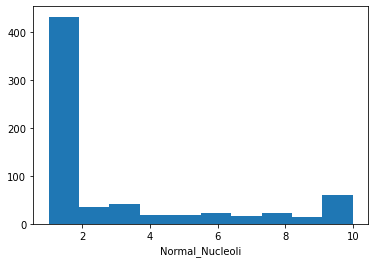

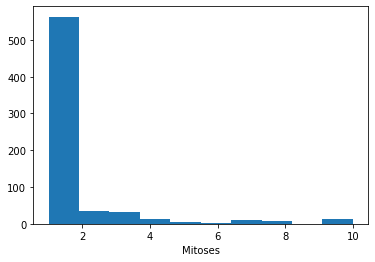

In [15]:
# plot histogram for every relevant features
for col in df.columns[1:-1]:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()


We see that almost every feature is clustered around a value and is highly skewed to the right. Clump thickness seems to have a uniform distribution.  

<AxesSubplot:>

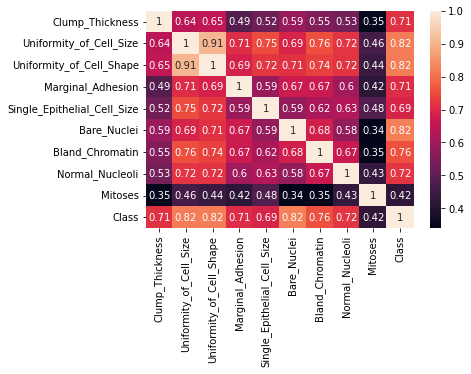

In [16]:
# examine correlation between all pairs of relevant features
import seaborn as sns
df = df.iloc[:, 1:] # remove the sample code number for future analysis
sns.heatmap(df.corr(),annot=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame([variance_inflation_factor(df.values, df.columns.get_loc(i)) for i in df.columns],columns=['vif'])
dfvif = pd.concat([pd.DataFrame(df.columns, columns=['Features']), vif],axis=1)
dfvif

,Features,vif
0,Clump_Thickness,7.388616
1,Uniformity_of_Cell_Size,14.278487
2,Uniformity_of_Cell_Shape,14.140133
3,Marginal_Adhesion,4.891961
4,Single_Epithelial_Cell_Size,7.907492
5,Bare_Nuclei,5.117965
6,Bland_Chromatin,8.748114
7,Normal_Nucleoli,4.534888
8,Mitoses,2.587868
9,Class,13.966760


The heatmap shows the correlation between each feature. We see that there is a strong corrlation between Uniformity_of_Cell_Size and Uniformity_of_Cell_Shape. The VIF value tells the same thing. 

We may choose one of Uniformity_of_Cell_Size and Uniformity_of_Cell_Shape for modelling as they are highly correlated. Here, we drop Uniformity_of_Cell_Size to proceed.

In [18]:
df_whole = df
df = df.loc[:, df.columns!='Uniformity_of_Cell_Size']

## Proposing models

There are many algorithms that can deal with the classification problem, either parametrically or non-parametrically. We propose one model for each, and will select the final model based on the performance. 

### Parametric model - Logistic regression

Logistic regression is suitable here because  
1. The result has binary outcome, e.g. benign or malignant, which satisfies the assumptions of logistic regression.
2. We assume each observation is independent.
3. We have removed the column Uniformity_of_Cell_Size to reduce multicolinearity. 
4. It is simple and efficient. 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'Class'],
    df.loc[:, df.columns =='Class'],
    test_size=0.25,
    random_state=1234)
print('training data: \n', y_train.value_counts())
print('test data: \n', y_test.value_counts())

training data: 
 Class
2        333
4        179
dtype: int64
test data: 
 Class
2        111
4         60
dtype: int64


To build the model, we randomly choose 75% of the data to be the training data, and the rest 25% of data to be the test data. 

To limit the impact of features with large scale, we need to standardize the scale of the data. Though in this case the scale of features are all at similar level, we still rescale the attributes so that they have mean 0 and variance 1 just to be safe. 

In [21]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)


In [22]:
# create logistic regression and fit the data
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train.values.ravel())
lr_y_predict = lr.predict(x_test_scaled)

In [23]:
print('Accuracy of LR Classifier: ', lr.score(x_test_scaled, y_test))

Accuracy of LR Classifier:  0.9649122807017544


In [24]:
print(classification_report(y_test, lr_y_predict, target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       111
   Malignant       0.94      0.97      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



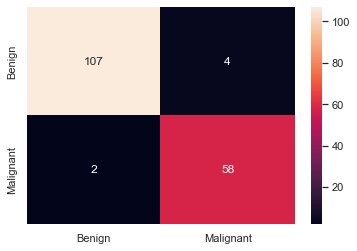

In [25]:
# visualize the confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, lr_y_predict), index=['Benign', 'Malignant'], columns=['Benign', 'Malignant'])

sns.set()
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.show()

We see that the model has around 96.5% accuracy for this particular test set and the precision, recall and f1 score are all relatively high.    
To get some insights, we examine the importance of each feature, which is indicated by the coefficients of linear regression. 

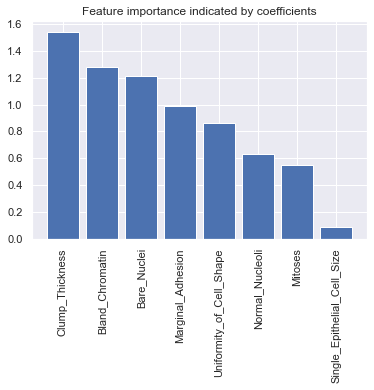

In [26]:
importances = pd.DataFrame(data={
    'Feature': x_train.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
# visualize the importance
plt.bar(x=importances['Feature'], height=importances['Importance'])
plt.title('Feature importance indicated by coefficients')
plt.xticks(rotation='vertical')
plt.show()


We see that Clump Thickness is the most important feature for predicting whether a biopsied breast cell is benign and the Single Epithelial Cell Size is the least important feature. However, this is for this particular training set. 
To validate if logistic regression is good, we use 10-fold cross validation. 

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = df.loc[:, df.columns != 'Class']
y = df.loc[:, df.columns =='Class']
x_cv_scaled = ss.fit_transform(X)

# use 10-fold cross validation to validate the model
cv_accuracy = cross_val_score(lr, x_cv_scaled, y.values.ravel(), scoring="accuracy", cv=10)
print("Average accuracy:", cv_accuracy.mean())
print("Standard deviation:",cv_accuracy.std())

Average accuracy: 0.9664109121909634
Standard deviation: 0.02349993365788225


10-fold cross validation gives 96.6% accuracy on average, and the 0.023 standard deviation shows that the model is stable. 
In medical context, we are also interest in the score of recall since it is important to detect all malignant cells.  
So we perform 10-fold cross validation on the score of recall as well. I manually code the cross validation as the argument pos_label can't be added to cross_val_score function. 

In [28]:
from sklearn.metrics import recall_score
kf = KFold(n_splits=10, shuffle=True, random_state=123)
cv_recall = []
feature_imp = []

for idx_train, idx_test in kf.split(X):
    lr = LogisticRegression()
    x_cv_scaled_train = ss.fit_transform(X.iloc[idx_train,:])
    x_cv_scaled_test = ss.transform(X.iloc[idx_test,:])
    y_cv_train = y.iloc[idx_train,:]
    y_cv_test = y.iloc[idx_test,:]
    lr.fit(x_cv_scaled_train, y_cv_train.values.ravel())
    lr_cv_y_predict = lr.predict(x_cv_scaled_test)
    cv_recall.append(recall_score(y_cv_test, lr_cv_y_predict, average="binary", pos_label=4))
    # As we have divided the data into folds, we can examine the average importance of each feature as well
    feature_imp.append(lr.coef_[0]) # importance is indicated by coefficient
    
print('average recall:', np.array(cv_recall).mean())


average recall: 0.9450248009071538


The average recall is around 94.5%, which is lower than the average percision but still quite high. 
We may conclude that logistic regression performs well in this problem. 

In [29]:
feature_imp_df = pd.DataFrame(data=feature_imp,columns=X.columns)
feature_imp_df.mean()

Clump_Thickness                1.334482
Uniformity_of_Cell_Shape       0.933790
Marginal_Adhesion              0.825221
Single_Epithelial_Cell_Size    0.267004
Bare_Nuclei                    1.304310
Bland_Chromatin                0.968724
Normal_Nucleoli                0.629879
Mitoses                        0.731992
dtype: float64

We see that clump thickness and bare nuclei are the most important features. Single eplithelial cell size is the least important one. 

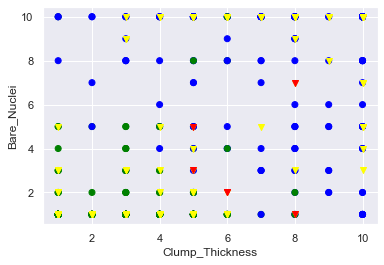

In [30]:
# Visualize the classification result
color = ['blue' if l == 4 else 'green' for l in y_train['Class']]
plt.scatter(x_train['Clump_Thickness'], x_train['Bare_Nuclei'], color=color)
plt.xlabel("Clump_Thickness")
plt.ylabel("Bare_Nuclei")
misclassified = x_test[list(y_test['Class']) != lr_y_predict]
plt.scatter(x_test['Clump_Thickness'], x_test['Bare_Nuclei'],color='yellow',marker='v')
plt.scatter(misclassified['Clump_Thickness'], misclassified['Bare_Nuclei'], color='red',marker='v')
plt.show()

This is the scatterplot showing the two most important features and the classification result. The dots are the training set where blue indicates malignant cells and green indicates benign cells. The triangles are the test set where yellow ones are correctly classified and red ones are misclassified.   
Misclassification happens near the boundary as shown in the graph. 
The real decision boundary is hard to visualize as it is of high dimension. 

### Non-parametric model - KNN

KNN supports non-linear decision boundaries, requires no assumptions on the original data, and is more robust to outliers compared to logistic regression. 
So we propose KNN algorithm to see if it has improvement. 




In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# split the data into training and test set, and standardize them
# we use the all attributes here since the multicolinearity issue is not important for KNN
x_train, x_test, y_train, y_test = train_test_split(
    df_whole.loc[:, df_whole.columns != 'Class'],
    df_whole.loc[:, df_whole.columns =='Class'],
    test_size=0.25,
    random_state=1234)

ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train.values.ravel())
knn_y_predict = knn.predict(x_test_scaled)

In [34]:
print('Accuracy of KNN Classifier: ', knn.score(x_test_scaled, y_test))
print(classification_report(y_test, knn_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of KNN Classifier:  0.9649122807017544
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       111
   Malignant       0.94      0.97      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



KNN algorithm gives similar results as linear regression on the same test data when k=5. 
Next we use 10-fold cross validation to find the best k. 

In [35]:
X = df_whole.loc[:, df_whole.columns != 'Class']
y = df_whole.loc[:, df_whole.columns =='Class']
x_cv_scaled = ss.fit_transform(X)

# use 10-fold cross validation to validate the model
cv_knn_accuracy = cross_val_score(knn, x_cv_scaled, y.values.ravel(), scoring="accuracy", cv=10)
print("Average accuracy:", cv_knn_accuracy.mean())
print("Standard deviation:",cv_knn_accuracy.std())


Average accuracy: 0.9693307757885762
Standard deviation: 0.026381764271218577


10-fold cross validation gives 96.9% accuracy on average which is a little bit better than logistic regression, and the model is less stable than logistic regression as it has higher standard deviation. 
We can also find the optimal k from the cross validation by trying k=1 to 10 and check the accuracy. 

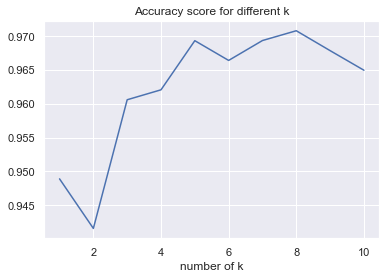

Accuracy score when k=8:  0.9708013640238704


In [36]:
accuracy = []
krange=range(1,11)

for i in krange:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_cv_accuracy=cross_val_score(knn, x_cv_scaled, y.values.ravel(),scoring='accuracy',cv=10)
    accuracy.append(knn_cv_accuracy.mean())
    
    
plt.plot(krange,accuracy)
plt.xlabel('number of k')
plt.title("Accuracy score for different k")
plt.show()
print("Accuracy score when k=8: ",max(accuracy))

We see that the optimal k is k=8 as it has the highest accuracy. 

In [37]:
from sklearn.metrics import recall_score
kf = KFold(n_splits=10, shuffle=True, random_state=123)
cv_knn_recall = []

for idx_train, idx_test in kf.split(X):
    knn = KNeighborsClassifier(n_neighbors = 8)
    x_cv_scaled_train = ss.fit_transform(X.iloc[idx_train,:])
    x_cv_scaled_test = ss.transform(X.iloc[idx_test,:])
    y_cv_train = y.iloc[idx_train,:]
    y_cv_test = y.iloc[idx_test,:]
    knn.fit(x_cv_scaled_train, y_cv_train.values.ravel())
    knn_cv_y_predict = knn.predict(x_cv_scaled_test)
    cv_recall.append(recall_score(y_cv_test, knn_cv_y_predict, average="binary", pos_label=4))

    
print('average recall:', np.array(cv_recall).mean())

average recall: 0.9426808485632016


The average score of recall is lower than logistic regression, although KNN with optimal k has higher accuracy. 

## Conclusion

In conclusion, the logistic regression model is the best model for this classification task since
1. KNN and logistic regression have similar performance, but logistic regression is simplier and requries less computing time and memory. 
2. The recall is important in medical analysis as we want to discover every positive case. Logistic regression has better performance for the recall. 
3. As logistic regression model is parametric, we can provide other statistical insights such as the confidence interval when predicting the labels for breast cells. 